In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#import seaborn as sn

# File to Load (Remember to Change These)

file_to_load  = "C:/Users/admin/Documents/SMU/Olympic_Athletes/olympic_data.csv"

# Read the City and Ride Data

# Read Purchasing File and store into Pandas data frame
olympics = pd.read_csv(file_to_load )
olympics.head()



,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,107506,Hermann Schreiber,M,26.0,NaN,NaN,Switzerland,SUI,1936 Summer,1936,Summer,Berlin,Aeronautics,Aeronautics Mixed Aeronautics,Gold
1,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Combined,Silver
2,20,Kjetil Andr Aamodt,M,26.0,176.0,85.0,Norway,NOR,1998 Winter,1998,Winter,Nagano,Alpine Skiing,Alpine Skiing Men's Combined,NaN
3,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Combined,Gold
4,634,Paul Accola,M,20.0,176.0,82.0,Switzerland,SUI,1988 Winter,1988,Winter,Calgary,Alpine Skiing,Alpine Skiing Men's Combined,Bronze


In [2]:
# Created a new column to filter data
#olympics["Winner/Loser"] = olympics["Medal"].replace({"Gold":"Winner", "Silver":"Loser", "Bronze":"Loser", "NaN":"Loser"})
#olympics.head()

In [24]:
# Selecting the columns that are needed for the analysis
bio_event_medal_df= olympics.loc[:, [ "ID","Name","NOC","Sex", "Sport", "Age", "Height", "Weight", "Medal"]]

bio_event_medal_df.head()

,ID,Name,NOC,Sex,Sport,Age,Height,Weight,Medal
0,107506,Hermann Schreiber,SUI,M,Aeronautics,26.0,NaN,NaN,Gold
1,20,Kjetil Andr Aamodt,NOR,M,Alpine Skiing,22.0,176.0,85.0,Silver
2,20,Kjetil Andr Aamodt,NOR,M,Alpine Skiing,26.0,176.0,85.0,NaN
3,20,Kjetil Andr Aamodt,NOR,M,Alpine Skiing,30.0,176.0,85.0,Gold
4,634,Paul Accola,SUI,M,Alpine Skiing,20.0,176.0,82.0,Bronze


In [4]:
# Create data series of ALL male gymnatics using multipe using conditionals (such as Medal, Sex and Sport)
MaleGymnast_df =bio_event_medal_df[((bio_event_medal_df["Sport"]=="Gymnastics" ) & (bio_event_medal_df["Sex"]=="M" ))]
count = MaleGymnast_df.groupby("NOC")["ID"].count()
AgeAverage = MaleGymnast_df.groupby(["NOC"]).mean()["Age"].rename("Age by NOC")
WeightAverage = MaleGymnast_df.groupby(["NOC"]).mean()["Weight"].rename("Weight by NOC")
HeightAverage = MaleGymnast_df.groupby(["NOC"]).mean()["Height"].rename("Height by NOC")

AYearTrend_df = pd.DataFrame({"ACount":count,"AAge":AgeAverage, "AHeight":HeightAverage, "AWeight":WeightAverage})

AYearTrend_df

AYearTrend_df.head()

,ACount,AAge,AHeight,AWeight
NOC,,,,
ALG,20,24.250000,169.950000,59.100000
ARG,100,23.507246,167.333333,66.583333
ARM,16,20.875000,163.375000,58.687500
AUS,224,22.980000,168.663043,66.522472
AUT,252,28.190476,169.777778,71.142857


In [5]:
# Create data series of ALL male gymnatics using multipe using conditionals (such as Medal, Sex and Sport)
GoldGymnast_df =bio_event_medal_df[((bio_event_medal_df['Medal']=="Gold") & (bio_event_medal_df["Sport"]=="Gymnastics" ) & (bio_event_medal_df["Sex"]=="M" ))]

Gcount = GoldGymnast_df.groupby("NOC")["ID"].count()
GAgeAverage = GoldGymnast_df.groupby(["NOC"]).mean()["Age"].rename("Age by NOC")
GWeightAverage = GoldGymnast_df.groupby(["NOC"]).mean()["Weight"].rename("Weight by NOC")
GHeightAverage = GoldGymnast_df.groupby(["NOC"]).mean()["Height"].rename("Height by NOC")

GYearTrend_df = pd.DataFrame({"GCount":Gcount,"GAge":GAgeAverage, "GHeight":GHeightAverage, "GWeight":GWeightAverage})

GYearTrend_df

GYearTrend_df.head()

,GCount,GAge,GHeight,GWeight
NOC,,,,
AUT,2,28.000000,168.000000,NaN
BRA,1,22.000000,156.000000,61.000000
BUL,2,20.000000,164.000000,57.000000
CAN,1,22.000000,164.000000,61.000000
CHN,34,22.470588,160.911765,55.676471


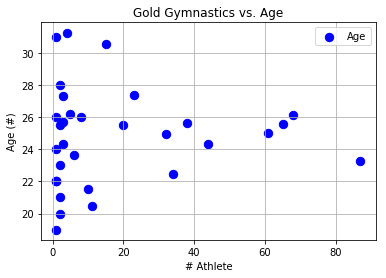

In [22]:
ax = GYearTrend_df.reset_index().plot(kind='scatter', x='GCount', y='GAge',     
                                      color='blue', s=70, label='Age')

# Incorporate the other graph properties
plt.title("Gold Gymnastics vs. Age")
plt.ylabel("Age (#)")
plt.xlabel("# Athlete")
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/admin/Documents/SMU/Olympic_Athletes/Gymnastics_Age")

# Show plot
plt.show()


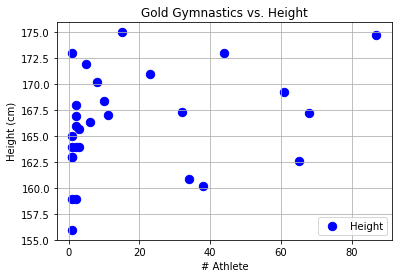

In [23]:
# Build scatter plot for athetics 
ax = GYearTrend_df.reset_index().plot(kind='scatter', x='GCount', y='GHeight', color='blue', s=70, label='Height')

# Incorporate the other graph properties
plt.title("Gold Gymnastics vs. Height")
plt.ylabel("Height (cm)")
plt.xlabel("# Athlete")
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/admin/Documents/SMU/Olympic_Athletes/Gymnastics_Height")

# Show plot
plt.show('upper right')

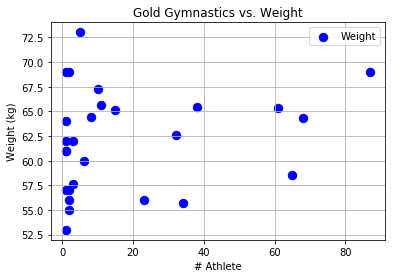

In [14]:
ax = GYearTrend_df.reset_index().plot(kind='scatter', x='GCount', y='GWeight',
                                           color='blue',  s=70, label='Weight')
# Incorporate the other graph properties
plt.title("Gold Gymnastics vs. Weight")
plt.ylabel("Weight (kg)")
plt.xlabel("# Athlete")
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/admin/Documents/SMU/Olympic_Athletes/Gymnastics_Weight")

# Show plot
plt.show()

In [ ]:
ax = sn.scatterplot(x="GCount", y="GWeight", size="size", hue="NOC",  data=GYearTrend_df)

In [ ]:
# Generate some fake data to test with
def gendata(loc1=0, loc2=0):
    population1 = stats.norm.rvs(loc=loc1, size=50, random_state=0)
    population2 = stats.norm.rvs(loc=loc2, size=45, random_state=42)

    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population1)), population1, label="population1")
    plt.scatter(range(len(population2)), population2, label="population2")
    plt.legend()

In [27]:
# Create data series of ALL male gymnatics using multipe using conditionals (such as Medal, Sex and Sport)
GoldGymnast_df =bio_event_medal_df[((bio_event_medal_df['Medal']=="Gold") & (bio_event_medal_df["Sport"]=="Gymnastics" ) 
                                    & (bio_event_medal_df["Sex"]=="M" ))]
GoldGymnast_df.head()

,ID,Name,NOC,Sex,Sport,Age,Height,Weight,Medal
131661,47659,"Edward August ""Ed"" Hennig",USA,M,Gymnastics,24.0,NaN,NaN,Gold
131663,102841,George Helm Roth,USA,M,Gymnastics,21.0,NaN,NaN,Gold
131683,1483,Nobuyuki Aihara,JPN,M,Gymnastics,25.0,154.0,53.0,Gold
131701,4198,Nikolay Yefimovich Andrianov,URS,M,Gymnastics,19.0,166.0,60.0,Gold
131702,4198,Nikolay Yefimovich Andrianov,URS,M,Gymnastics,23.0,166.0,60.0,Gold


In [ ]:
# Create data series of ALL male gymnatics using multipe using conditionals (such as Medal, Sex and Sport)
Gymn_all_df =olympics[((olympics["Sex"]=="M") & (olympics["Sport"]=="Gymnastics" ))]

# Data Cleaning to remove missing/null values
#Gymn_all_df=Gymn_all_df.dropna(how="any")

# Calculate the averages using ALL gymnastics participants creating a filtered data frame
gymnastics_cnt = len(Gymn_all_df['ID'].value_counts())
#gymnastics_cnt = Gymn_all_df['ID'].nunique()
avg_age=Gymn_all_df["Age"].mean()

avg_height=Gymn_all_df["Height"].mean()

avg_weight=Gymn_all_df["Weight"].mean()

# Creating DataFrame of ALL gymnastics participants

olympic_dtframe=pd.DataFrame({"Number of gymnatics":[gymnastics_cnt],"Average Age":[avg_age],
                              "Average Height":[avg_height],"Average Weight":[avg_weight]})



#Sorting

#olympic_srt_dt=olympic_dtframe.sort_values(by=["Average Age","Average Height"], ascending=[True, False], inplace=True)


olympic_dtframe.head()

In [ ]:
Olympic_noc_df = pd.DataFrame(pd.pivot_table(olympics,index=["NOC","Sex"],values=["Age","Height","Weight"],aggfunc=[np.mean,]))
Olympic_noc_df.head()

In [ ]:
Olympic_st_df = pd.DataFrame(pd.pivot_table(olympics,index=["Sport"],values=["Age","Height","Weight"],aggfunc=[np.mean,]))
Olympic_st_df.head()